# Naive Bayes

## Análise de Sentimentos através de comentários 

### Base de dados

* Base de dados de tweets coletado por uma companhia de TI de MG
* Contém tweets e seus sentimentos
* Os sentimentos foram rotulados pela equipe que coletou os dados 

In [2]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [3]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

In [4]:
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [6]:
dataset.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
                            ...                        
95    #noticiasdorenan Uso de depósitos judiciais pe...
96    #OperacaoBetaLab #TimBeta #Beta #BetaLab #Beta...
97    #OperacaoBetaLab #TimBeta #Beta #BetaLab #Beta...
98    #OperacaoBetaLab #TimBeta #Beta #BetaLab #Beta...
99    #operacaobetalab BB avisa Justiça que governo ...
Name: Text, Length: 100, dtype: object

In [7]:
# excluir linhas duplicadas
dataset.drop_duplicates(['Text'],inplace=True)

In [8]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [9]:
# Removendo Colunas desnecessárias- Unnamed
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [10]:
dataset.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN


In [11]:
# Visualizando as colunas do dataset
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

### Distribuição das classes neutros, positivos e negativos

In [12]:
import matplotlib.pyplot as plt

<ipython-input-13-edfe84018846>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(dataset.Classificacao.value_counts().index,dataset.Classificacao.value_counts(),color=my_colors)


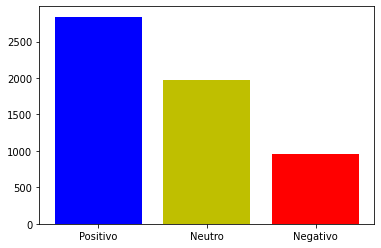

In [13]:
my_colors = 'byr'
plt.bar(dataset.Classificacao.value_counts().index,dataset.Classificacao.value_counts(),color=my_colors)
plt.show()

## Separando tweets e suas classes

In [14]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [15]:
tweets.head()

0    ���⛪ @ Catedral de Santo Antônio - Governador ...
1    � @ Governador Valadares, Minas Gerais https:/...
2    �� @ Governador Valadares, Minas Gerais https:...
3                          ��� https://t.co/BnDsO34qK0
4    ��� PSOL vai questionar aumento de vereadores ...
Name: Text, dtype: object

In [16]:
classes.head()

0      Neutro
1      Neutro
2      Neutro
3      Neutro
4    Negativo
Name: Classificacao, dtype: object

## Gerando o modelo

In [17]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)

## Cria um modelo usando Naive Bayes Multinomial

In [18]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

## Testando o modelo com algumas instâncias simples

In [19]:
# testes dentro de uma lista de comentários
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [20]:
# Transformando os testes em vetores de palavras
freq_testes = vectorizer.transform(testes)

In [21]:
# Classificando os testes com o modelo treinado
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [22]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

## Métricas avaliativas para o modelo ##

### Fazendo o cross validation do modelo

In [23]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

### Matriz de confusão

In [24]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       846     100         5   951
Neutro         206    1656       112  1974
Positivo        53     294      2493  2840
All           1105    2050      2610  5765


### Métricas de validação do modelo

In [25]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974
    Positivo       0.96      0.88      0.91      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



## Tunning do Naive Bayes

In [26]:
from sklearn.model_selection import GridSearchCV

### Defina uma lista de valores de Alpha

In [27]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Cria um dicionario com o nome do parametro e a lista de valores

In [28]:
parametros_grid = dict(alpha=lista_alpha)

In [29]:
parametros_grid

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

### Instancia um modelo

In [30]:
nvModelo = MultinomialNB()

### Cria o objeto Grid

In [31]:
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

### Roda o Grid

In [32]:
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

### Melhores Scores

In [33]:
grid.cv_results_

{'mean_fit_time': array([0.01793582, 0.01687887, 0.01585977, 0.01654792, 0.01688516,
        0.01613162, 0.01823764, 0.01612129, 0.01606421, 0.01562879]),
 'std_fit_time': array([0.00173188, 0.00219458, 0.00132615, 0.00176161, 0.00279906,
        0.00187821, 0.00683441, 0.00148621, 0.00130429, 0.00151717]),
 'mean_score_time': array([0.00109448, 0.00106516, 0.00100682, 0.0011003 , 0.0013608 ,
        0.00114276, 0.00115657, 0.00110762, 0.00112808, 0.00101337]),
 'std_score_time': array([8.99970103e-05, 7.49873393e-05, 9.59378973e-05, 1.27688275e-04,
        8.81818041e-04, 3.43872406e-04, 3.00841396e-04, 1.99701715e-04,
        2.80065247e-04, 3.98654401e-05]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha'

### Melhores parâmetros

In [34]:
grid.best_params_

{'alpha': 1}

In [35]:
grid.best_score_

0.8664846307529368

### Para melhor visualização 

In [36]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,grid.cv_results_['params']):
    print(f'Mean {mean} -Std {std} -Params {params}')
print()
print(f'Better : 1 Param {grid.best_params_}, 2 Scores {grid.best_score_}')

Mean 0.8664846307529368 -Std 0.12690066486432747 -Params {'alpha': 1}
Mean 0.8643988903331407 -Std 0.1240349335457383 -Params {'alpha': 2}
Mean 0.8619692374350085 -Std 0.11778335857630363 -Params {'alpha': 3}
Mean 0.855375926728288 -Std 0.1157880407218485 -Params {'alpha': 4}
Mean 0.8496500698055074 -Std 0.11561883044197024 -Params {'alpha': 5}
Mean 0.8577911371076448 -Std 0.1144247659172391 -Params {'alpha': 6}
Mean 0.8539756041787022 -Std 0.11421021636903278 -Params {'alpha': 7}
Mean 0.8402795830926248 -Std 0.11015470224297774 -Params {'alpha': 8}
Mean 0.8378508328519162 -Std 0.10757452896973466 -Params {'alpha': 9}
Mean 0.8317771519352976 -Std 0.10639459388087873 -Params {'alpha': 10}

Better : 1 Param {'alpha': 1}, 2 Scores 0.8664846307529368


### Validando tunning Algoritmo

In [37]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5)
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [38]:
freq_testes = vectorizer.transform(testes)

In [39]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [40]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [41]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974
    Positivo       0.89      0.92      0.90      2840

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



## Considerações Finais

* O modelo retornou sentimentos satisfatórios, sendo a precisão 84% para negativo, 79% para neutro e 89% para positivo.  

* O aumento da quantidado de dados de treino supostamente irá nos entregar maior confiabilidade no modelo.

* Considere alterar os parâmetros do algoritmo para novos testes.

* O algoritmo Naive Bayes é um algoritmo de fácil implementação e computacionalmente rápido para treinar o modelo.

* Devido aos fatos anteriores, é um bom algoritmo de "baseline", ou seja, pode ser um ponto de partida para avaliar melhor o problema e definir um algoritimo que forneça uma visão melhor dos dados.
